Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?
- The fundamental idea behind ensemble techniques is to combine the predictions of multiple models (often called weak learners) to produce a single, more accurate and robust model.
- Instead of relying on a single model, ensemble methods aggregate multiple models’ outputs.
- The ensemble’s final prediction is often more stable and accurate than any individual model’s prediction.
- Bagging, short for Bootstrap Aggregating, aims mainly to reduce variance. It does this by training several models independently on different random subsets of the training data, created through sampling with replacement. Because each model sees a slightly different dataset, their errors tend to cancel out when their predictions are averaged (in regression) or voted on (in classification). This makes bagging particularly effective for models that are unstable—meaning small changes in data can lead to large changes in predictions—like decision trees. Random Forest is the best-known example of a bagging method. Since the models are independent, they can be trained in parallel.
- Boosting, in contrast, focuses on reducing bias and improving model accuracy by training models sequentially. Each new model tries to correct the errors made by the previous ones. The algorithm assigns higher weights to the samples that were misclassified, forcing subsequent models to pay more attention to difficult cases. The final model is a weighted combination of all the weak learners. Boosting can transform simple models (like shallow trees) into highly accurate predictors. Popular examples include AdaBoost, Gradient Boosting, and XGBoost. However, because each model depends on the results of the previous ones, boosting cannot be parallelized easily.

Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.
- A Random Forest Classifier reduces overfitting compared to a single decision tree by introducing randomness and averaging during the training process.
- A single decision tree tends to overfit because it tries to perfectly classify the training data, capturing noise and specific details.
- A Random Forest builds an ensemble of decision trees, each trained slightly differently:
- Each tree sees a random subset of the training data (bootstrap sampling).
- Each split in a tree is based on a random subset of features.
- Because of this randomness, individual trees make different errors. When the model averages their predictions (majority vote for classification), the random errors cancel out, reducing variance and thus overfitting.
- (a) n_estimators — Number of Trees
Increasing n_estimators (the number of trees) reduces variance because more trees mean better averaging.
However, after a certain point, adding more trees yields diminishing returns and increases computation time.
Effect on overfitting:
More trees → better averaging → less variance → less overfitting.
- (b) max_features — Number of Features Considered at Each Split
This parameter controls how many features each tree can consider when making a split.
A smaller max_features introduces more randomness among trees (they see different subsets of features), making them less correlated.
Effect on overfitting:
Smaller max_features → trees are more diverse → lower correlation → better averaging → less overfitting.

Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.
- Stacking (or Stacked Generalization) is an ensemble learning technique that combines multiple different models (called base learners) using a meta-model (or meta-learner) to improve overall predictive performance.
- How Stacking Works
  - Train Base Models:You train several different models (e.g., decision trees, logistic regression, random forest, SVM) on the same training data.
  - Generate Meta-Features:Each base model makes predictions on a validation set (or via cross-validation).
These predictions (not the original features) are used as inputs (meta-features) for the meta-model.
  - Train Meta-Model:
The meta-model learns to combine the predictions of the base models to produce a final prediction.
A common choice is a simple model like linear regression or logistic regression.
- Bagging:1)idea-Combine multiple models trained independently on random subsets of data. 2)base models-Usually the same (e.g., many decision trees in Random Forest). 3)training relationship-Independent, parallel. 4)example algorithm-Random Forest 5)goal-Reduce variance.
- Boosting:1)idea-Sequentially train models to correct the errors of previous ones. 2)base models-Usually the same type, sequentially improved. 3)training relationship-Dependent, sequential (each model focuses on previous errors). 4)example algorithm-AdaBoost, XGBoost, LightGBM 5)goal-Reduce bias.
- Boosting:1)idea-Combine predictions from multiple different models using a meta-learner 2)base models-Can be different (e.g., SVM, Random Forest, Neural Net, etc.). 3)training relationship-Independent base models; meta-model learns how to best combine them. 4)example algorithm-Stacked Regressor / Classifier 5)goal-Leverage strengths of diverse models.
- Problem: Predict whether a loan applicant will default (binary classification).
Base Models:

Model 1: Logistic Regression (good for linear relationships)

Model 2: Random Forest (captures non-linearities, interactions)

Model 3: Gradient Boosted Trees (strong general-purpose model)

Meta-Model:

Logistic Regression trained on the predictions of the three models.

How it works:
Each base model predicts the probability of default. These three probabilities become inputs for the meta-model, which learns how to weight them — maybe the Random Forest is more reliable for certain ranges of data, while Logistic Regression performs better for simpler cases.

Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?
- the Out-of-Bag (OOB) Score is one of the clever built-in features of Random Forests that helps you evaluate your model without needing a separate validation or test set.
- In a Random Forest, each tree is trained on a bootstrap sample of the training data — meaning it’s trained on a random subset with replacement.
Because sampling is with replacement:
On average, each tree uses about 63% of the data for training.
The remaining ~37% of the data (not included in that tree’s bootstrap sample) is called the Out-of-Bag (OOB) data for that tree.
- The OOB Score is calculated by using these “unused” samples to test the trees that didn’t see them during training.
- Each observation in the dataset is left out of the bootstrap sample for some of the trees (usually around one-third of them).
- For that observation, predictions are made using only the trees where it was OOB.
- These OOB predictions are then aggregated (e.g., majority vote for classification, mean for regression).
- The aggregated OOB predictions are compared to the true labels → this gives the OOB error rate (or equivalently, OOB score = 1 - OOB error).
- 1)No need for a separate validation set:
Because each sample is effectively validated using the trees that didn’t train on it, you can use your entire dataset for both training and evaluation.
- 2)Efficient internal cross-validation:
The OOB process acts like a built-in form of cross-validation, but without the computational overhead of explicitly partitioning data multiple times.
- 3)Early indication of generalization error:
The OOB score provides a reliable estimate of model performance on unseen data, helping you detect overfitting early.
- example: Suppose you train a Random Forest with 100 trees on 1,000 samples.

Each tree trains on about 630 samples (bootstrap sample).

The other ~370 samples are “out-of-bag” for that tree.

For each sample, collect predictions from only the trees where it was OOB.

Aggregate those predictions → compare to true label → get OOB accuracy.

If the OOB accuracy is, say, 0.87, that’s roughly what you might expect your model to score on truly unseen data.


Question 5:Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases
- 1. How They Handle Errors from Weak Learners:
 - adaboost:
Error Focus:
AdaBoost explicitly increases the weights of misclassified samples, forcing the next weak learner to focus more on those hard examples.
Error Handling Method:
It adjusts the data distribution — samples that are misclassified gain higher weights.
Interpretation:
Think of it as reweighting the data to "pay more attention" to mistakes.
- gradient boosting:
Error Focus:
Gradient Boosting fits the next weak learner to the residual errors (the difference between predicted and actual values) from the previous model.
Error Handling Method:
It adjusts the target — residuals (errors) become the new target to model.
Interpretation:
Think of it as sequentially correcting residual errors through gradient descent in function space.
- 2. Weight Adjustment Mechanism:
Each sample’s weight is updated based on whether it was correctly or incorrectly classified.
- 3. Typical Use Cases:
  - adaboost:1)Works well with simple, fast learners like shallow decision stumps.2)Performs well on clean, moderately complex datasets.3)Can be sensitive to noisy data and outliers, since misclassified samples get exponentially more weight.4)Simpler to implement and interpret.
  - gradient boosting:1)Used with decision trees (usually deeper than stumps), forming models like XGBoost, LightGBM, and CatBoost.2)More flexible and powerful — can handle complex nonlinear relationships and large datasets.3)More robust (especially with regularization, learning rate control, and subsampling).4)More accurate and widely used in production ML systems.


Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.
- CatBoost performs well on categorical features because it uses a special encoding method that allows it to handle them natively, without requiring one-hot encoding or extensive preprocessing.
- Target-based encoding (Mean encoding):
CatBoost converts categorical values into numerical ones using statistics derived from the target variable (e.g., average target value for each category).
However, simple mean encoding can cause target leakage (using information from the training labels directly).
- Ordered Target Statistics:
To avoid target leakage, CatBoost uses an ordered encoding approach:
It processes the data in a random permutation.
For each example, it computes the encoding using only previous examples in that permutation (i.e., values seen before the current one).
This mimics the way the model would see data in a real prediction scenario.
- Combination of categorical features:
CatBoost also generates combinations of categorical features and applies the same encoding, allowing it to capture higher-order interactions automatically.

In [1]:
"""
Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.
"""
#step 1:import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 2:Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Step 3: Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Train KNN (default K=5) without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

print("=== KNN without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_unscaled))

# Step 5: Apply StandardScaler and retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n=== KNN with StandardScaler ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))

# Step 6: GridSearchCV for best K (1–20) and distance metric (Euclidean, Manhattan)
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train_scaled, y_train)

print("\n=== Grid Search Results ===")
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Step 7: Train optimized KNN and evaluate
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\n=== Optimized KNN (GridSearchCV) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Step 8: Summary comparison
print("\n=== Summary Comparison ===")
print(f"Unscaled Accuracy: {accuracy_score(y_test, y_pred_unscaled):.4f}")
print(f"Scaled Accuracy:   {accuracy_score(y_test, y_pred_scaled):.4f}")
print(f"Optimized Accuracy:{accuracy_score(y_test, y_pred_best):.4f}")


=== KNN without Scaling ===
Accuracy: 0.7222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


=== KNN with StandardScaler ===
Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


=== Grid Search Results ===
Best Parameters: {'metric': 'euclidean',

Dataset shape: (569, 30)
Classes: ['malignant' 'benign']


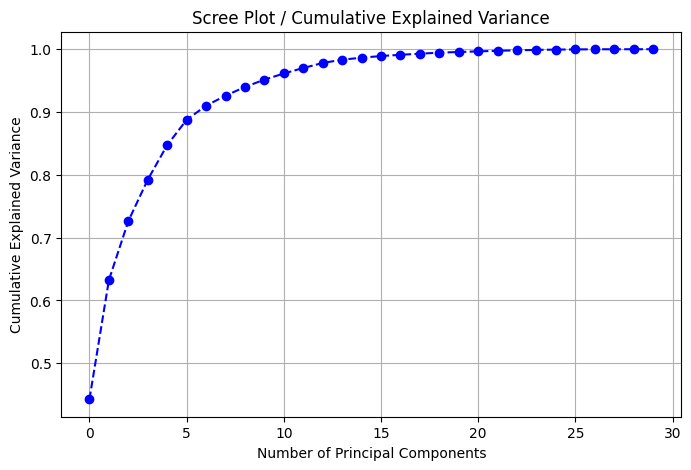


Original shape: (569, 30)
PCA (95% variance) shape: (569, 10)
Number of components retained: 10

KNN Accuracy on Original Data: 0.9591
KNN Accuracy on PCA-Reduced Data: 0.9649


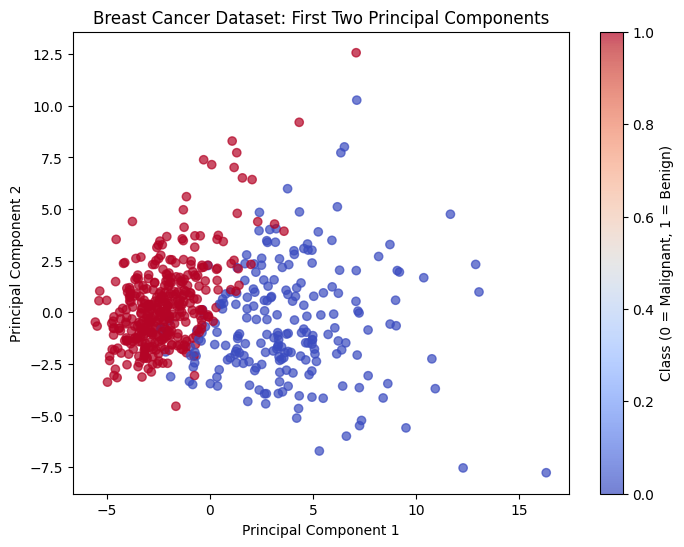

In [2]:
"""
Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).
"""
# ==========================================
# PCA + KNN with Variance Analysis & Visualization
# ==========================================

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# -----------------------------
# 1. Load the Breast Cancer dataset
# -----------------------------
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

print(f"Dataset shape: {X.shape}")
print(f"Classes: {data.target_names}")

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 2. Apply PCA and plot the scree plot
# -----------------------------
pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.title('Scree Plot / Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# -----------------------------
# 3. Retain 95% variance and transform the dataset
# -----------------------------
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)

print(f"\nOriginal shape: {X_scaled.shape}")
print(f"PCA (95% variance) shape: {X_pca.shape}")
print(f"Number of components retained: {pca_95.n_components_}")

# -----------------------------
# 4. Train KNN on original and PCA-transformed data
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

# Train and test on original data
knn.fit(X_train, y_train)
y_pred_orig = knn.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

# Train and test on PCA data
knn.fit(X_train_pca, y_train)
y_pred_pca = knn.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f"\nKNN Accuracy on Original Data: {acc_orig:.4f}")
print(f"KNN Accuracy on PCA-Reduced Data: {acc_pca:.4f}")

# -----------------------------
# 5. Visualize the first two principal components
# -----------------------------
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Breast Cancer Dataset: First Two Principal Components')
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.show()



=== Distance Metric Comparison (K=5) ===
Euclidean MSE: 4787.1929
Manhattan MSE: 5361.1823


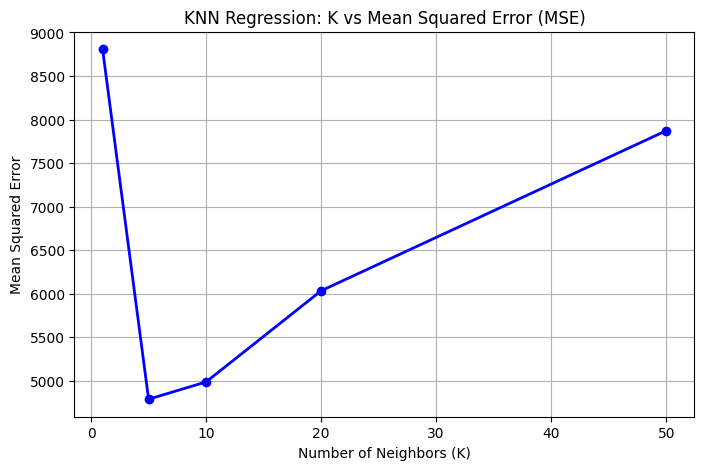


=== Bias-Variance Tradeoff Analysis ===
→ Small K (e.g., K=1): Low bias, high variance — model may overfit.
→ Large K (e.g., K=50): High bias, low variance — model may underfit.
→ Optimal K usually minimizes MSE by balancing both.


In [3]:
"""
Question 9:KNN Regressor with Distance Metrics and K-Value
analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.
"""
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# ------------------------------
# 1. Generate synthetic regression dataset
# ------------------------------
X, y = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)

# Split data into train and test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# 2. Train KNN Regressors with Euclidean & Manhattan distances
# ------------------------------
k = 5

# (a) Euclidean distance (default metric)
knn_euclidean = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# (b) Manhattan distance (L1 norm)
knn_manhattan = KNeighborsRegressor(n_neighbors=k, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("=== Distance Metric Comparison (K=5) ===")
print(f"Euclidean MSE: {mse_euclidean:.4f}")
print(f"Manhattan MSE: {mse_manhattan:.4f}")

# ------------------------------
# 3. Test different K values and analyze bias-variance tradeoff
# ------------------------------
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)


plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o', color='b', linewidth=2)
plt.title("KNN Regression: K vs Mean Squared Error (MSE)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

# ------------------------------
# Interpretation
# ------------------------------
print("\n=== Bias-Variance Tradeoff Analysis ===")
print("→ Small K (e.g., K=1): Low bias, high variance — model may overfit.")
print("→ Large K (e.g., K=50): High bias, low variance — model may underfit.")
print("→ Optimal K usually minimizes MSE by balancing both.")


In [6]:
"""
Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
"""
 #step:1

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, names=columns)

# Replace zeros with NaN for features where 0 is invalid
features_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[features_with_missing] = data[features_with_missing].replace(0, np.nan)

data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
#step:2
# Separate features and target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# KNN Imputer
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scale features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
#step:3
algorithms = ["brute", "kd_tree", "ball_tree"]
results = {}

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start_time = time.time()
    knn.fit(X_train, y_train)
    end_time = time.time()

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    elapsed = end_time - start_time

    results[algo] = {"accuracy": accuracy, "time": elapsed}

results_df = pd.DataFrame(results).T
print(results_df)


           accuracy      time
brute      0.714286  0.003556
kd_tree    0.714286  0.004101
ball_tree  0.714286  0.006034


In [9]:
#step:4
feature_importance = pd.DataFrame({"Feature": X.columns, "Correlation": np.abs(np.corrcoef(X_imputed.T, y, rowvar=True)[-1][:-1])})
feature_importance = feature_importance.sort_values(by="Correlation", ascending=False)
top2_features = feature_importance["Feature"].values[:2]
print("Top 2 features:", top2_features)


Top 2 features: ['Glucose' 'Insulin']


Best algorithm: brute


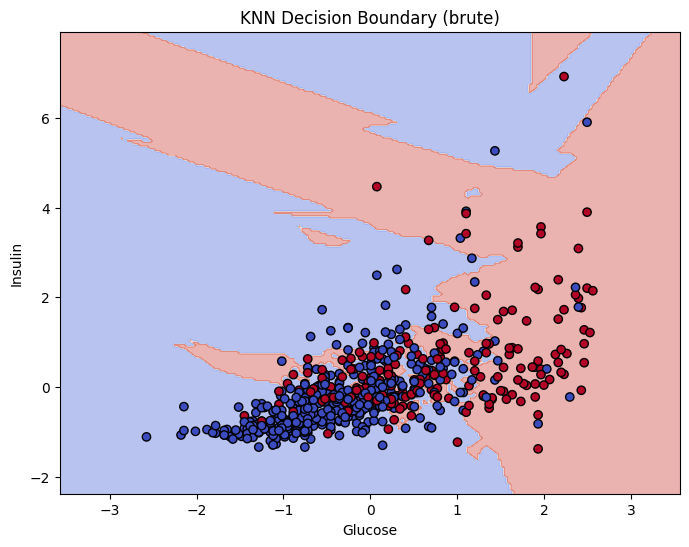

In [10]:
#step:5
best_algo = results_df['accuracy'].idxmax()
print("Best algorithm:", best_algo)

# Use only top 2 features
X_top2 = X_imputed[:, [X.columns.get_loc(f) for f in top2_features]]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_top2, y, test_size=0.2, random_state=42)
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

# Train best KNN
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X_train2, y_train2)

# Plot decision boundary
x_min, x_max = X_train2[:, 0].min() - 1, X_train2[:, 0].max() + 1
y_min, y_max = X_train2[:, 1].min() - 1, X_train2[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.title(f"KNN Decision Boundary ({best_algo})")
plt.show()
